In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss
import seaborn as sns
import joblib


Load Preprocesed data from the CSV File

In [9]:
file_path = '/Volumes/Code/SocialNetworkAds/Data/Preprocessed_Social_Network_Ads.csv'
df = pd.read_csv(file_path)

Prepare features and target Variable

In [10]:
X = df.drop('Purchased', axis=1)
Y = df['Purchased']

Spliting Data one for traing and other for testing

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

Initialise and train the logistic model

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)


LogisticRegression(max_iter=1000)

Make Predictions

In [13]:
Y_pred = model.predict(X_test)
Y_prob = model.predict_proba(X_test) #for log loss



# Evaluate the Model

In [14]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test,Y_pred))

Confusion Matrix:
[[51  1]
 [11 17]]


In [15]:
print("\nClassification Report")
print(classification_report(Y_test,Y_pred))


Classification Report
              precision    recall  f1-score   support

           0       0.82      0.98      0.89        52
           1       0.94      0.61      0.74        28

    accuracy                           0.85        80
   macro avg       0.88      0.79      0.82        80
weighted avg       0.87      0.85      0.84        80



In [16]:
print("Log Loss")
print(log_loss(Y_test, Y_prob))

Log Loss
0.3807286250205186


Plotting weight of feature (Coefficients of variables)

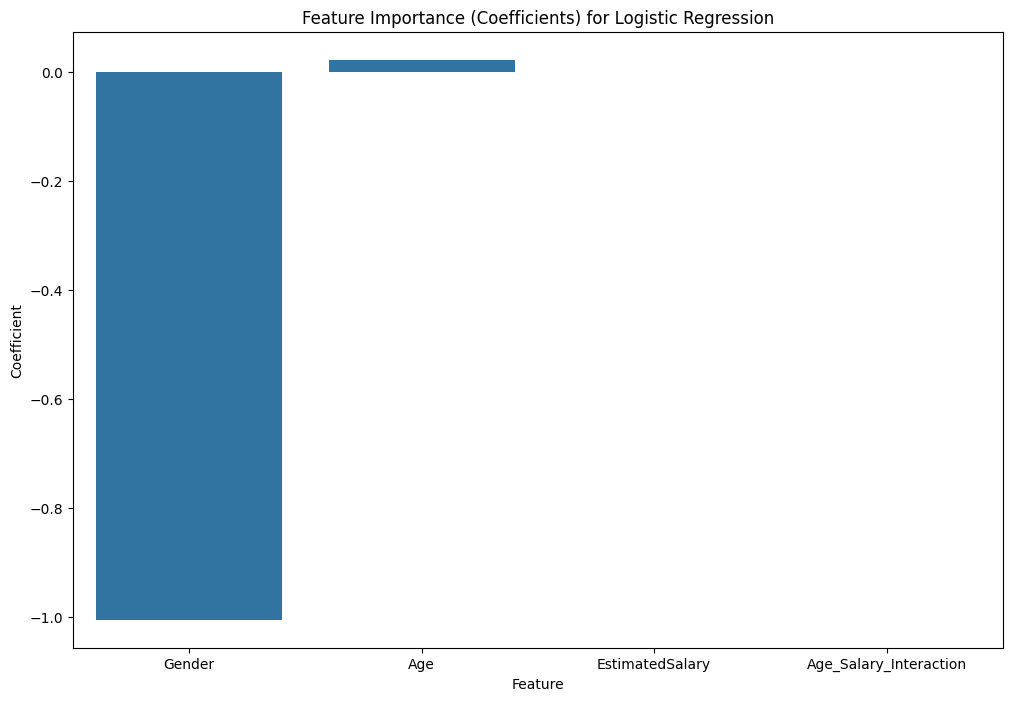

In [17]:
feature_name = X.columns
coefficients = model.coef_.flatten()

plt.figure(figsize=(12,8))
sns.barplot(x=feature_name,y=coefficients)
plt.xticks(fontsize = 10)
plt.title('Feature Importance (Coefficients) for Logistic Regression')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()